In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


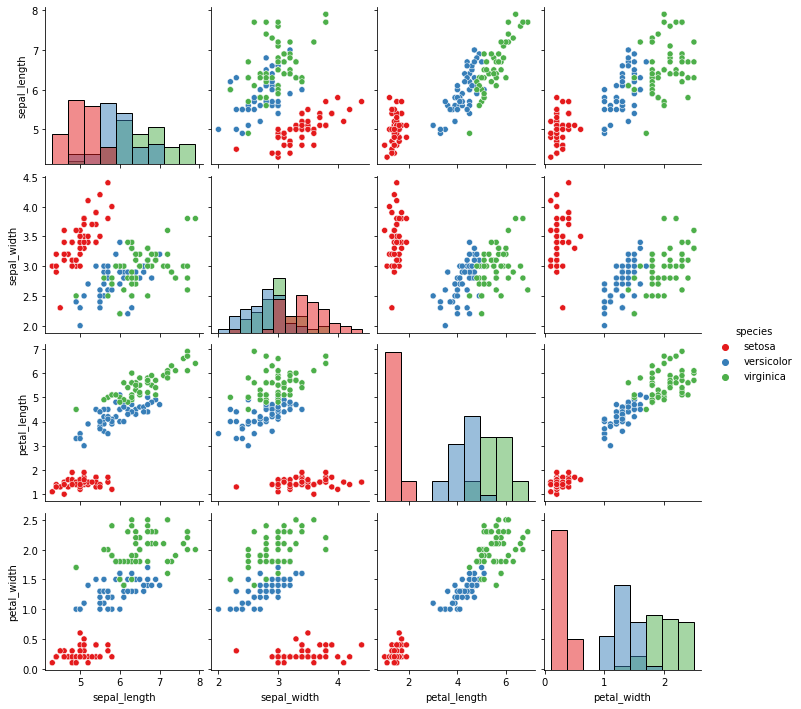

In [7]:
sns.pairplot(iris,hue = "species",diag_kind="hist",palette="Set1")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

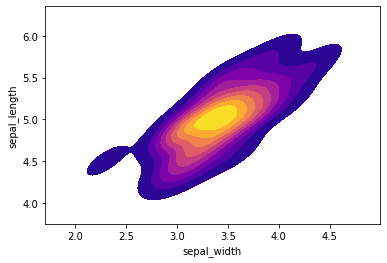

In [49]:
sns.kdeplot(x = "sepal_width",y = "sepal_length",data = iris[iris["species"] == "setosa"],color = "purple",cmap = "plasma",shade=True)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris.drop("species",axis  =1)
y = iris["species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train,y_train)

SVC()

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [25]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {"C":[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001]}

In [43]:
grid = GridSearchCV(estimator=SVC(),param_grid = param_grid,verbose=5)

In [44]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=5)

In [45]:
grid_predict = grid.predict(X_test)

In [46]:
print(classification_report(y_test,grid_predict))
print(confusion_matrix(y_test,grid_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
